In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4

AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

Loading the library to compute the charge distribution of dust grains.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 1

########################################################################################

grain_size = 100

#save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
#filename = "CompletenessCopy_0005AA_sil_CR.pkl"

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

<function close>

In [3]:
########################################################################################

grain_size =100

save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
#filename = "fz_0%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

#pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
#cdist = pickle.load(pkl_file)
#pkl_file.close

# Load Qabs.
#Qabs = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")
#Qabs = fz.get_QabsTable(grain_type, grain_size)

## Heating per grain:

$$ \Gamma^{'}_{pe}(a) = \sum_{Z}f_{Z}(Z)\Gamma^{''}_{pe}(a,Z,G)$$

In [13]:
# Need to separate fZ for each grain.

In [14]:
#I could just compute Gamma_pe_a_Z for all possible Z's, and just give it to the function.
# Because if I have to loop over each grain and have to compute Gamma_pe_a_Z every time, it will take longer...

In [4]:
grain_type="silicate"
Qabs = fz.get_QabsTable(grain_type, grain_size)
#Qabs = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

Zmin_sil, Zmax_sil = fz.get_Zmin(grain_size, grain_type), fz.get_Zmax(grain_size, grain_type)
Znum_sil = int(Zmax_sil + abs(Zmin_sil) +1)
ZZ_sil = np.linspace(Zmin_sil, Zmax_sil, num=Znum_sil)

Gamma_dotdot_Z_sil = np.zeros_like(ZZ_sil, dtype=np.float)

for i in range(Znum_sil):
    Gamma_dotdot_Z_sil[i] = peh.get_Gamma_pe_dotdot(grain_size, ZZ_sil[i], grain_type, 0.0, Qabs, G0=1.7)

Gamma_a = np.zeros_like(cdist["zmean"], dtype=np.float)
cum = 0

#for index in range(100):
for index in range(len(Gamma_a)):
    
    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist["G"][index] + cdist["G_CR"][index]
        
    Gamma_dotdot_Z_sil_scaled = Gamma_dotdot_Z_sil*(Gtot/1.7)

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist["fdist"][index]
    cum += znum
    
    Gamma_a[index]= peh.Gamma_per_grain(ZZ_sil, Gamma_dotdot_Z_sil_scaled, ZZfz, ffz)
    #print(Gamma_a[index])

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


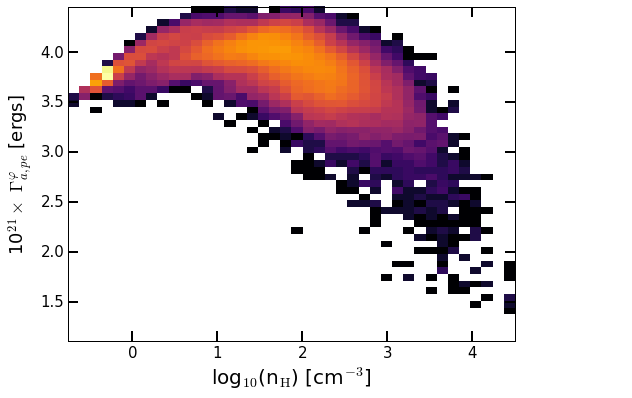

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(cdist["nH"]),np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("log$_{10}$(n$_{\mathrm{H}}$) [cm$^{-3}$]", fontsize=20)
ax.set_ylabel("10$^{21} \\times$ $\Gamma^{'}_{a, pe}$ [ergs]", fontsize=18)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_yscale("log")

ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)

fig.show()

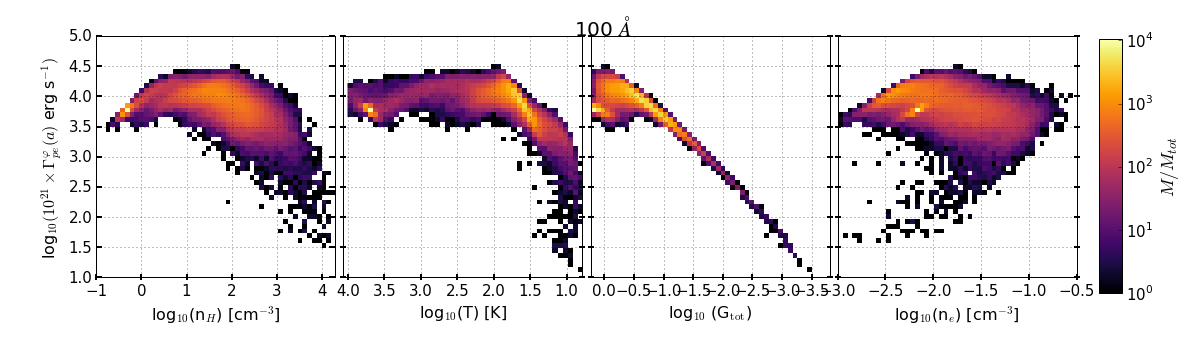

In [6]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.3],[1, 5]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("log$_{10}(10^{21} \\times \Gamma^{'}_{pe}(a)$ erg s$^{-1})$", fontsize=16)
ax.set_xlabel("log$_{10}$(n$_{H}$) [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[1, 5]])

#ax.hist2d(np.log10(cdist["temp"][0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$(T) [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)




############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

# Missing G_CR
ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[1, 5]])

#cax = ax.hist2d(np.log10(cdist["G"][0:len(cell_mass)]+G_CR[0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$ (G$_{\\mathrm{tot}}$)", fontsize=16)

#ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]))])
ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["ne"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[1, 5]])

#Gamma_a*1.0e21, bins=50, norm=LogNorm(), cmap="", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(n$_{e}$) [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)



#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_Gamma_dot_%iAA.pdf"%grain_size, format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_Gamma_dot_%iAA.pdf"%grain_size, format="pdf")


# Here I should compute the net heating.

$$ \Gamma^{'}_{pe}(a) - \Lambda(a)$$

---

In [7]:
def Cool_Grain(grain_size, grain_type, ZZ, fdist, ntot, xe, temp):
    """
    Compute the cooling per grain.
    """
    import numpy as np
    import math
    import compute_charge_dist as fz

    tau = grain_size * fz.AAtocm * fz.kb * temp / fz.echarge**2
    
    # Loop over species!
    Cool_spec = 0
    for partner in ["electron", "hydrogen", "carbon"]:
    
        Cool_Zall = 0
        # Loop over charge
        for zi in range(len(ZZ)):

            if partner == "electron":
                nu          = -1*ZZ[zi]
                stick_coef  = fz.get_stickCoef(ZZ[zi], grain_size, grain_type)
                charge_frac = xe
                mass        = fz.me
                
            elif partner == "hydrogen":
                nu         = ZZ[zi]
                stick_coef = 1.0
                charge_frac = xe
                mass        = fz.mH
                
            elif partner == "carbon":
                nu         = ZZ[zi]
                stick_coef = 1.0
                # Maximum fraction of ionized Carbon is 1e-4*ntot.
                charge_frac = min(1.0e-4, xe)
                mass        = fz.mC

            Cooltilde = 1.0

            if nu < 0:
                Cooltilde = fz.Jtilde_neg(tau, nu)
            elif nu == 0:
                Cooltilde = fz.Jtilde_0(tau, nu)
            else:
                Cooltilde = fz.Jtilde_pos(tau, nu)

            Cool_Zhere = fdist[zi]*Cooltilde*fz.kb*temp
            Cool_Zall += Cool_Zhere
            
        #print("Collisional Partner = ", partner)
        Cool_spec += ntot*charge_frac*stick_coef*np.sqrt(8.0*fz.kb*temp/(np.pi*mass))*Cool_Zall
        
    Cool_tot = math.pi * (grain_size*AAtocm)**2 * Cool_spec
    
    return Cool_tot

In [8]:
CoolingAA = np.zeros_like(cdist["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist["nH"])):
#for index in range(1):

    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist["G"][index] + cdist["G_CR"][index]

    ntot = cdist["nH"][index]
    xe   = cdist["new_xe"][index]
    temp = cdist["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist["fdist"][index]
    cum +=znum
    
    #print("Input parameters", grain_type, ZZfz, ffz, ntot, xe, temp)
    CoolingAA[index] = Cool_Grain(100.0, grain_type, ZZfz, ffz, ntot, xe, temp)
    #print(CoolingAA[index])
    

In [9]:
netHeat = Gamma_a - CoolingAA

In [10]:
print(np.min(np.abs(netHeat)))
print(np.max(netHeat))

4.43453490324e-21
2.86519530107e-17


In [11]:
neg = np.where(netHeat < 0)

In [12]:
print(len(neg[0]))

61


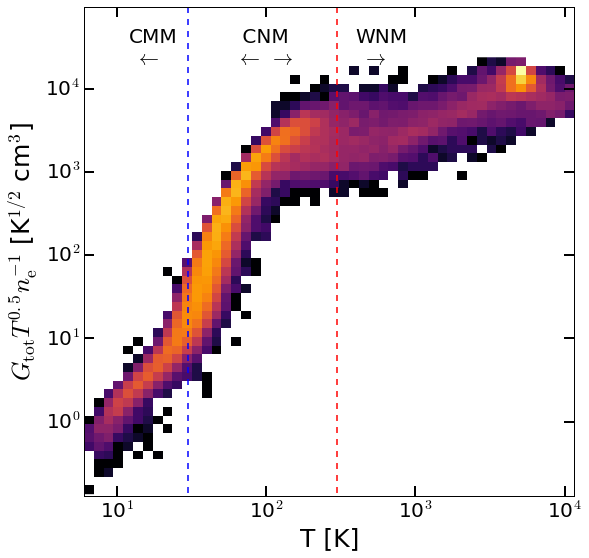

In [67]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.13, 0.11, 0.85, 0.85])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(cdist["temp"]),np.log10(GTn), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("T [K]", fontsize=25)
ax.set_ylabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

ax.plot([np.log10(30), np.log10(30)], [-1, 1.0e5], "--b", linewidth=1.5)
ax.plot([np.log10(300), np.log10(300)], [-1, 1.0e5], "--r", linewidth=1.5)

ax.text(np.log10(12), 4.3, "CMM\n $\\leftarrow$", fontsize=20)
ax.text(1.8, 4.3, " CNM\n$\\leftarrow$ $\\rightarrow$", fontsize=20)
ax.text(2.6, 4.3, "WNM\n $\\rightarrow$", fontsize=20)


ax.set_ylim(-0.9, 4.99)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_0_GTnDist.pdf", format="pdf")


fig.show()

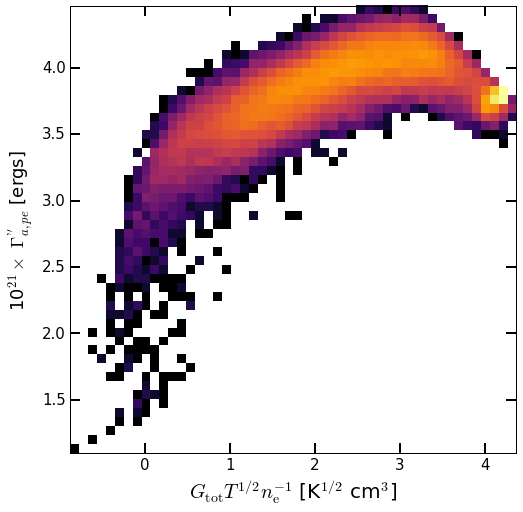

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(GTn),np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("$G_{\mathrm{tot}}T^{1/2} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=20)
ax.set_ylabel("10$^{21} \\times$ $\Gamma^{\mathrm{''}}_{a, pe}$ [ergs]", fontsize=18)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)

fig.show()

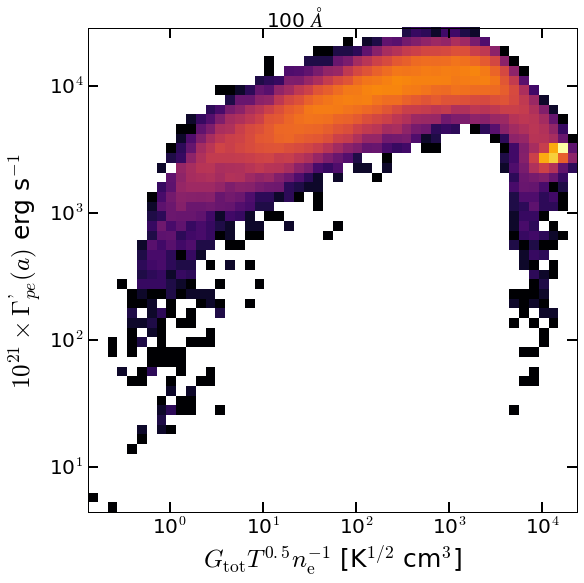

In [75]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.14, 0.11, 0.85, 0.84])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(np.abs(netHeat)*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1}$", fontsize=25)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_4_%s_%i_GTn.pdf"%(grain_type, grain_size), format="pdf")


fig.show()

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:162: RuntimeWarning: invalid value encountered in log10


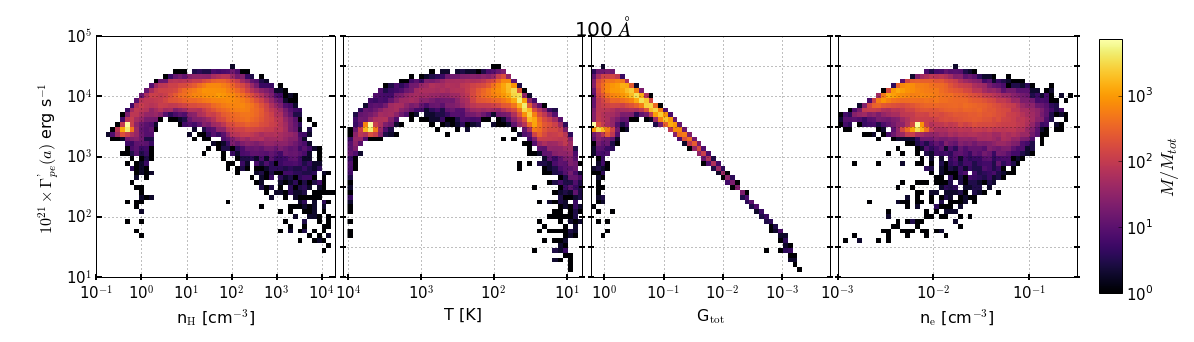

In [44]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)
# Formatting tick labels in log scale.
from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.3],[1, 5]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1}$", fontsize=16)
ax.set_xlabel("n$_{\\mathrm{H}}$ [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[1, 5]])

#ax.hist2d(np.log10(cdist["temp"][0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("T [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

# Missing G_CR
ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[1, 5]])

#cax = ax.hist2d(np.log10(cdist["G"][0:len(cell_mass)]+G_CR[0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("G$_{\\mathrm{tot}}$", fontsize=16)

#ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]))])
ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["ne"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[1, 5]])

#Gamma_a*1.0e21, bins=50, norm=LogNorm(), cmap="", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("n$_{\\mathrm{e}}$ [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")



## Now do this for various grains.

In [76]:
grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 1

########################################################################################

grain_size = 5

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
#filename = "CompletenessCopy_0005AA_sil_CR.pkl"

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

Qabs = fz.get_QabsTable(grain_type, grain_size)

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Using the absorption efficiency for a 10 AA grain


In [77]:
Zmin_sil, Zmax_sil = fz.get_Zmin(cdist["grain_size"], grain_type), fz.get_Zmax(cdist["grain_size"], grain_type)
Znum_sil = int(Zmax_sil + abs(Zmin_sil) +1)
ZZ_sil = np.linspace(Zmin_sil, Zmax_sil, num=Znum_sil)

Gamma_dotdot_Z_sil = np.zeros_like(ZZ_sil, dtype=np.float)

for i in range(Znum_sil):
    Gamma_dotdot_Z_sil[i] = peh.get_Gamma_pe_dotdot(cdist["grain_size"], ZZ_sil[i], grain_type, 0.0, Qabs, G0=1.7)

Gamma_a = np.zeros_like(cdist["zmean"], dtype=np.float)
Cooling = np.zeros_like(cdist["nH"], dtype=np.float)
G_CR    = np.zeros_like(cdist["nH"], dtype=np.float)
cum = 0

#for index in range(3):
for index in range(len(Gamma_a)):
    
    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    NH2 = fz.get_NH2(cdist["fH2shield"][index], cdist["temp"][index])
    #G_CR[index] = fz.get_G_CR(NH2)
    
    Gtot = cdist["G"][index] + cdist["G_CR"][index]
    #Gtot = cdist["G"][index] + G_CR[index]
        
    Gamma_dotdot_Z_sil_scaled = Gamma_dotdot_Z_sil*(Gtot/1.7)

    ZZfz = np.arange(zmin, zmax+1, 1)
    
    ffz = np.array(cdist["fdist"][cum:cum+znum])
    #ffz = cdist["fdist"][index]
    cum += znum
    #print(ZZfz)
    #print(ffz)
    
    Gamma_a[index]= peh.Gamma_per_grain(ZZ_sil, Gamma_dotdot_Z_sil_scaled, ZZfz, ffz)
    #print(Gamma_a[index])
    
    ntot = cdist["nH"][index]
    xe   = cdist["new_xe"][index]
    temp = cdist["temp"][index]
    
    #print(cdist["grain_size"], grain_type, ZZfz, ffz, ntot, xe, temp)
    Cooling[index] = peh.Cool_per_Grain(cdist["grain_size"], grain_type, ZZfz, ffz, ntot, xe, temp)
    
netHeat = Gamma_a - Cooling

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/pynverse/inverse.py:196: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  % accuracy, RuntimeWarning)


In [78]:
print(len(netHeat))
print(len(cdist["nH"]))

85943
85943


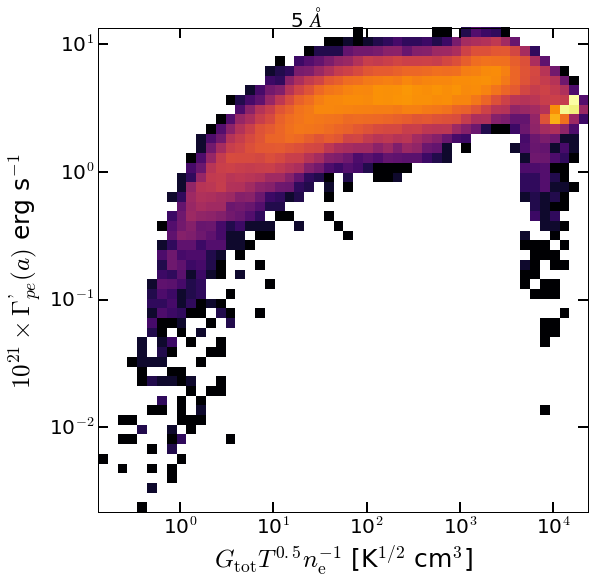

In [79]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.14, 0.11, 0.85, 0.84])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(np.abs(netHeat)*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1}$", fontsize=25)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_4_%s_%i_GTn.pdf"%(grain_type, grain_size), format="pdf")


fig.show()

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/numpy/lib/function_base.py:779: RuntimeWarning: invalid value encountered in less_equal
  if np.any(np.asarray(dedges[i]) <= 0):


ValueError: cannot convert float NaN to integer

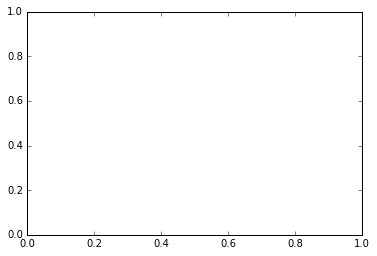

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(netHeat*1.0e21), bins=50)
ax.grid("on")

ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1})$", fontsize=16, labelpad=-0.5)
ax.set_xlabel("n$_{\\mathrm{H}}$ [cm$^{-3}$]", fontsize=16)
fig.show()

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:147: RuntimeWarning: invalid value encountered in log10


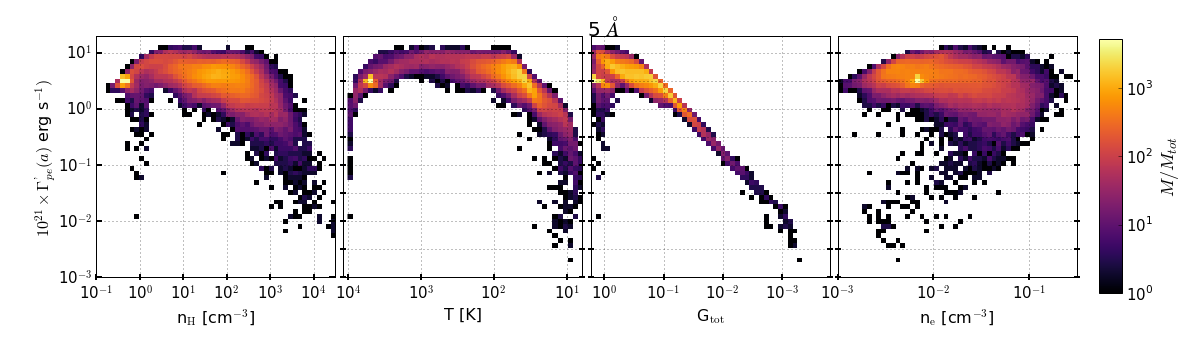

In [94]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

min_netHeat = 0.001
max_netHeat = max(netHeat)*1.0e21 *1.5

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.5],[np.log10(min_netHeat), np.log10(max_netHeat)]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1})$", fontsize=16, labelpad=-0.5)
ax.set_xlabel("n$_{\\mathrm{H}}$ [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("T [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(netHeat*1.0e21), bins=50,  norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("G$_{\\mathrm{tot}}$", fontsize=16)

ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["new_ne"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("n$_{\\mathrm{e}}$ [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")



---

In [80]:
grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 0.1

########################################################################################

grain_size = 1000

save_dir = "/home/jcibanezm/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
#filename = "CompletenessCopy_0005AA_sil_CR.pkl"

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

Qabs = fz.get_QabsTable(grain_type, grain_size)

In [81]:
Zmin_sil, Zmax_sil = fz.get_Zmin(cdist["grain_size"], grain_type), fz.get_Zmax(cdist["grain_size"], grain_type)
Znum_sil = int(Zmax_sil + abs(Zmin_sil) +1)
ZZ_sil = np.linspace(Zmin_sil, Zmax_sil, num=Znum_sil)

Gamma_dotdot_Z_sil = np.zeros_like(ZZ_sil, dtype=np.float)

for i in range(Znum_sil):
    Gamma_dotdot_Z_sil[i] = peh.get_Gamma_pe_dotdot(cdist["grain_size"], ZZ_sil[i], grain_type, 0.0, Qabs, G0=1.7)

Gamma_a = np.zeros_like(cdist["zmean"], dtype=np.float)
Cooling = np.zeros_like(cdist["nH"], dtype=np.float)
G_CR    = np.zeros_like(cdist["nH"], dtype=np.float)
cum = 0

#for index in range(10):
for index in range(len(Gamma_a)):
    
    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    NH2 = fz.get_NH2(cdist["fH2shield"][index], cdist["temp"][index])
    
    Gtot = cdist["G"][index] + cdist["G_CR"][index]
        
    Gamma_dotdot_Z_sil_scaled = Gamma_dotdot_Z_sil*(Gtot/1.7)

    ZZfz = np.arange(zmin, zmax+1, 1)
    
    ffz = cdist["fdist"][index]
    cum += znum
    
    Gamma_a[index]= peh.Gamma_per_grain(ZZ_sil, Gamma_dotdot_Z_sil_scaled, ZZfz, ffz)
    
    ntot = cdist["nH"][index]
    xe   = cdist["new_xe"][index]
    temp = cdist["temp"][index]
    
    Cooling[index] = peh.Cool_per_Grain(cdist["grain_size"], grain_type, ZZfz, ffz, ntot, xe, temp)
    
netHeat = Gamma_a - Cooling

In [82]:
print(np.log10(min(abs(netHeat))*1.0e21))
print(np.log10(max(abs(netHeat))*1.0e21))

2.59396317251
6.22875260501


In [83]:
print("Done")

Done


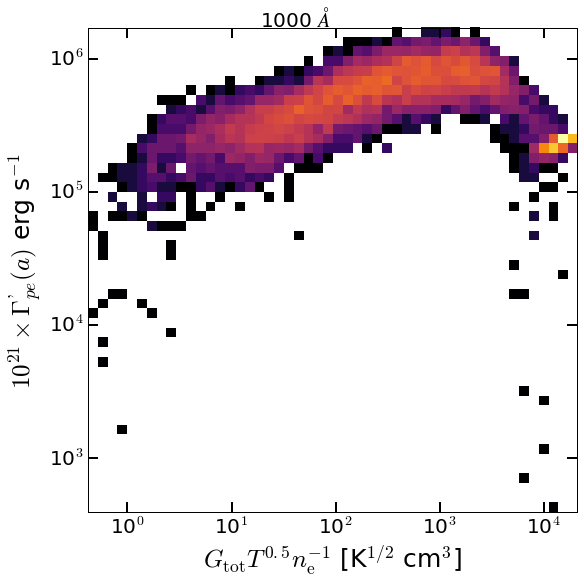

In [84]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.14, 0.11, 0.85, 0.84])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (cdist["G"]+cdist["G_CR"])*np.sqrt(cdist["temp"])/cdist["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(np.abs(netHeat)*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1}$", fontsize=25)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_4_%s_%i_GTn.pdf"%(grain_type, grain_size), format="pdf")


fig.show()

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:113: RuntimeWarning: invalid value encountered in log10
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/ipykernel/__main__.py:147: RuntimeWarning: invalid value encountered in log10


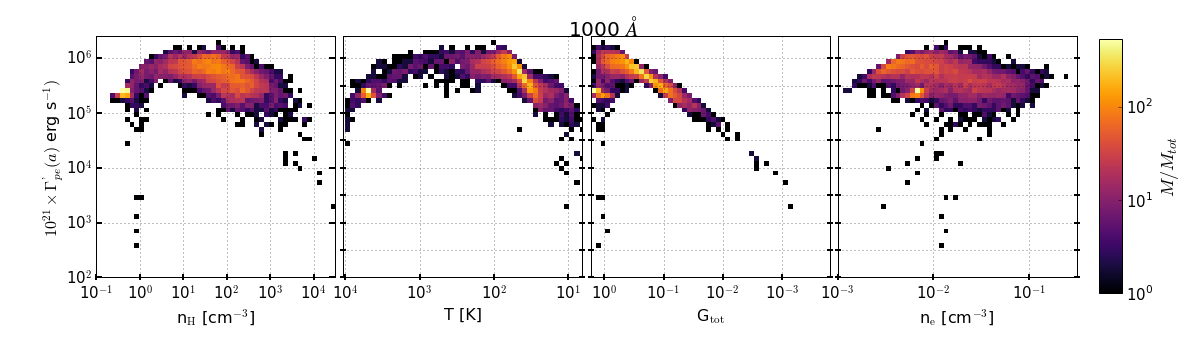

In [99]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

min_netHeat = 100.
max_netHeat = max(netHeat)*1.0e21 *1.5

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.5],[np.log10(min_netHeat), np.log10(max_netHeat)]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("$10^{21} \\times \Gamma^{\\mathrm{'}}_{pe}(a)$ erg s$^{-1})$", fontsize=16, labelpad=-0.5)
ax.set_xlabel("n$_{\\mathrm{H}}$ [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("T [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(netHeat*1.0e21), bins=50,  norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("G$_{\\mathrm{tot}}$", fontsize=16)

ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["new_ne"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[np.log10(min_netHeat), np.log10(max_netHeat)]])

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("n$_{\\mathrm{e}}$ [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")
#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")

